### Importing Libraries

In [42]:
# For Data Analysis & Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# For Model Building
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import joblib

### Loading Dataset

In [3]:
df = pd.read_csv("D:/Ankit-KCode/Human Stress Detection and Prediction/Human Stress Factors Dataset.csv")
df.head(10)

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,1
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,1
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,0
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,1
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,0
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,0


In [4]:
df.shape

(630, 9)

### Data Preprocessing

##### Basic Insights Of Dataset

In [5]:
# Data Type info of Colums
df.dtypes

Snoring Rate        float64
Respiratory Rate    float64
Body Temperature    float64
Limb Movement       float64
Blood Oxygen        float64
Eye Movement        float64
Sleep Hours         float64
Heart Rate          float64
Stress Levels         int64
dtype: object

In [6]:
# Statistical Summary of Dataset
df.describe()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,0.600000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,0.490287
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,0.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,1.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,1.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring Rate      630 non-null    float64
 1   Respiratory Rate  630 non-null    float64
 2   Body Temperature  630 non-null    float64
 3   Limb Movement     630 non-null    float64
 4   Blood Oxygen      630 non-null    float64
 5   Eye Movement      630 non-null    float64
 6   Sleep Hours       630 non-null    float64
 7   Heart Rate        630 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


<h8>There is no Null Value.</h8>

In [8]:
df.duplicated().sum()

0

In [9]:
# Checking Distribution of Target Variable
df['Stress Levels'].value_counts()

Stress Levels
1    378
0    252
Name: count, dtype: int64

### Data Visualization

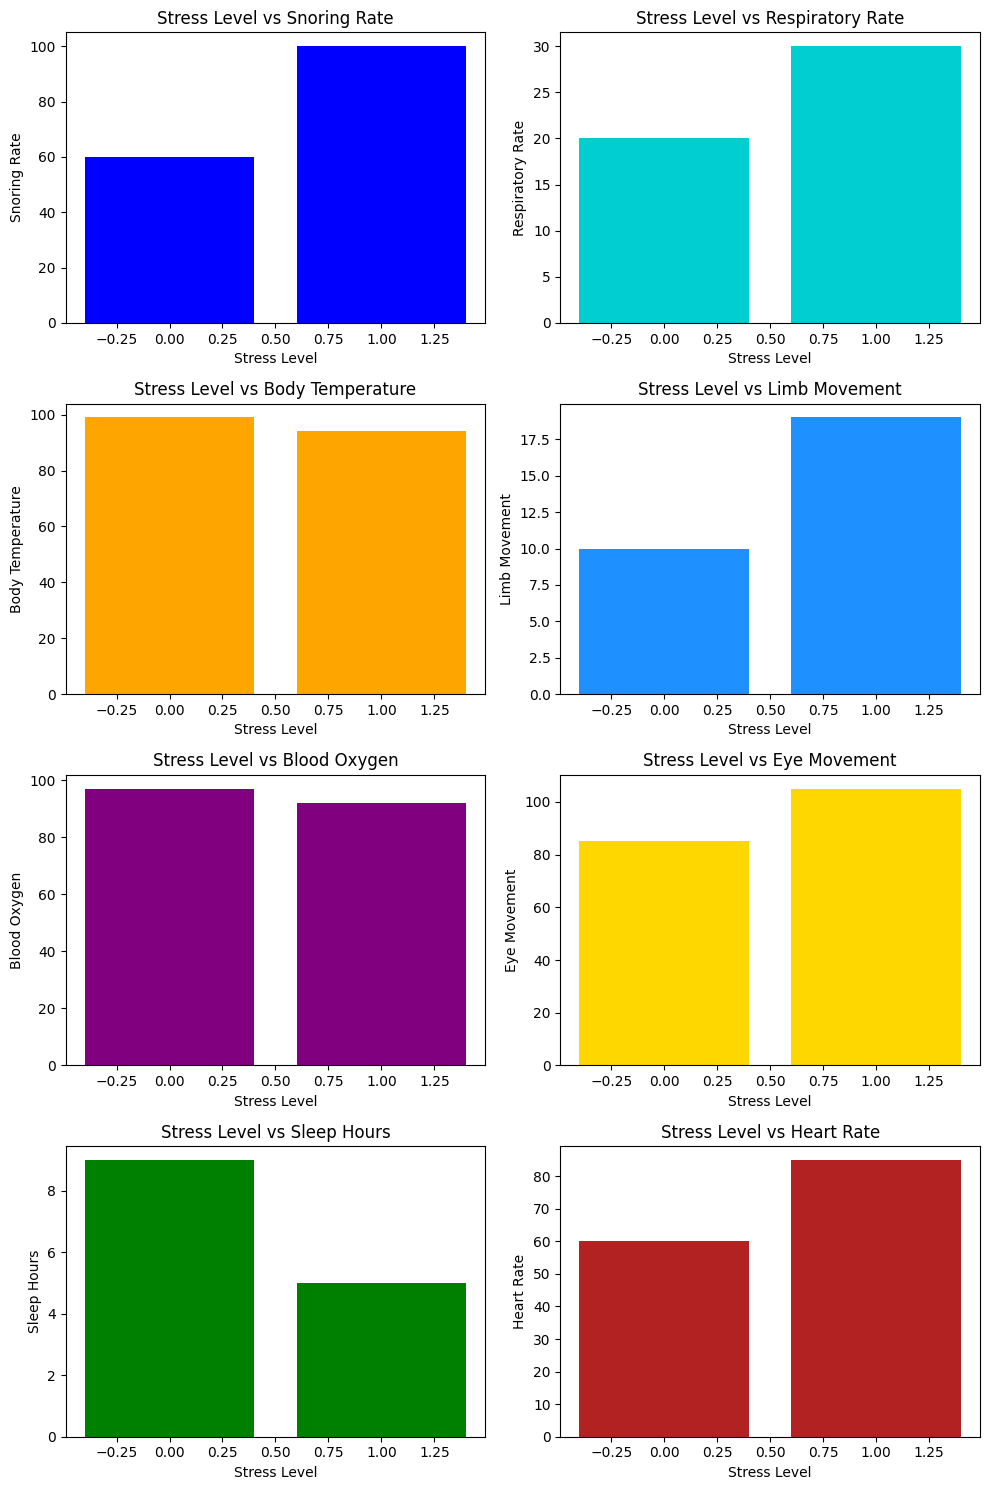

In [10]:
# Define the columns for plotting
columns = ['Snoring Rate', 'Respiratory Rate', 'Body Temperature', 'Limb Movement', 'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 'Heart Rate']
stress_levels = df['Stress Levels']

# Set up the figure and subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a list of colors for each graph
colors = ['blue', 'darkturquoise', 'orange', 'dodgerBlue', 'purple', 'gold', 'green', 'firebrick']

# Plot each column against stress levels
for i, column in enumerate(columns):
    axes[i].bar(stress_levels, df[column], color= colors[i])
    axes[i].set_title('Stress Level vs ' f'{column}')
    axes[i].set_xlabel('Stress Level')
    axes[i].set_ylabel(column)

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

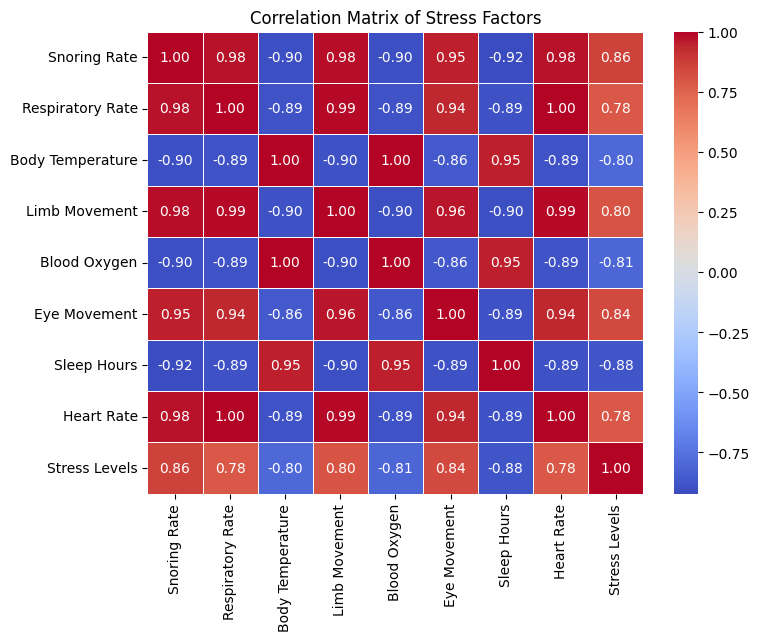

In [11]:
# Plotting Correlation Matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Stress Factors')

# Show the plot
plt.show()

##### PairPlot - Visualizing Relationships

Analysing how features like heart rate, sleep hours, and snoring rate relate to each other and to the stress level.
For example, people with high heart rates tend to have higher stress levels.

A pairplot can show natural clusters between data points. For instance, you may observe that certain combinations of body temperature, respiration rate, and limb movement are strongly associated with specific stress levels.

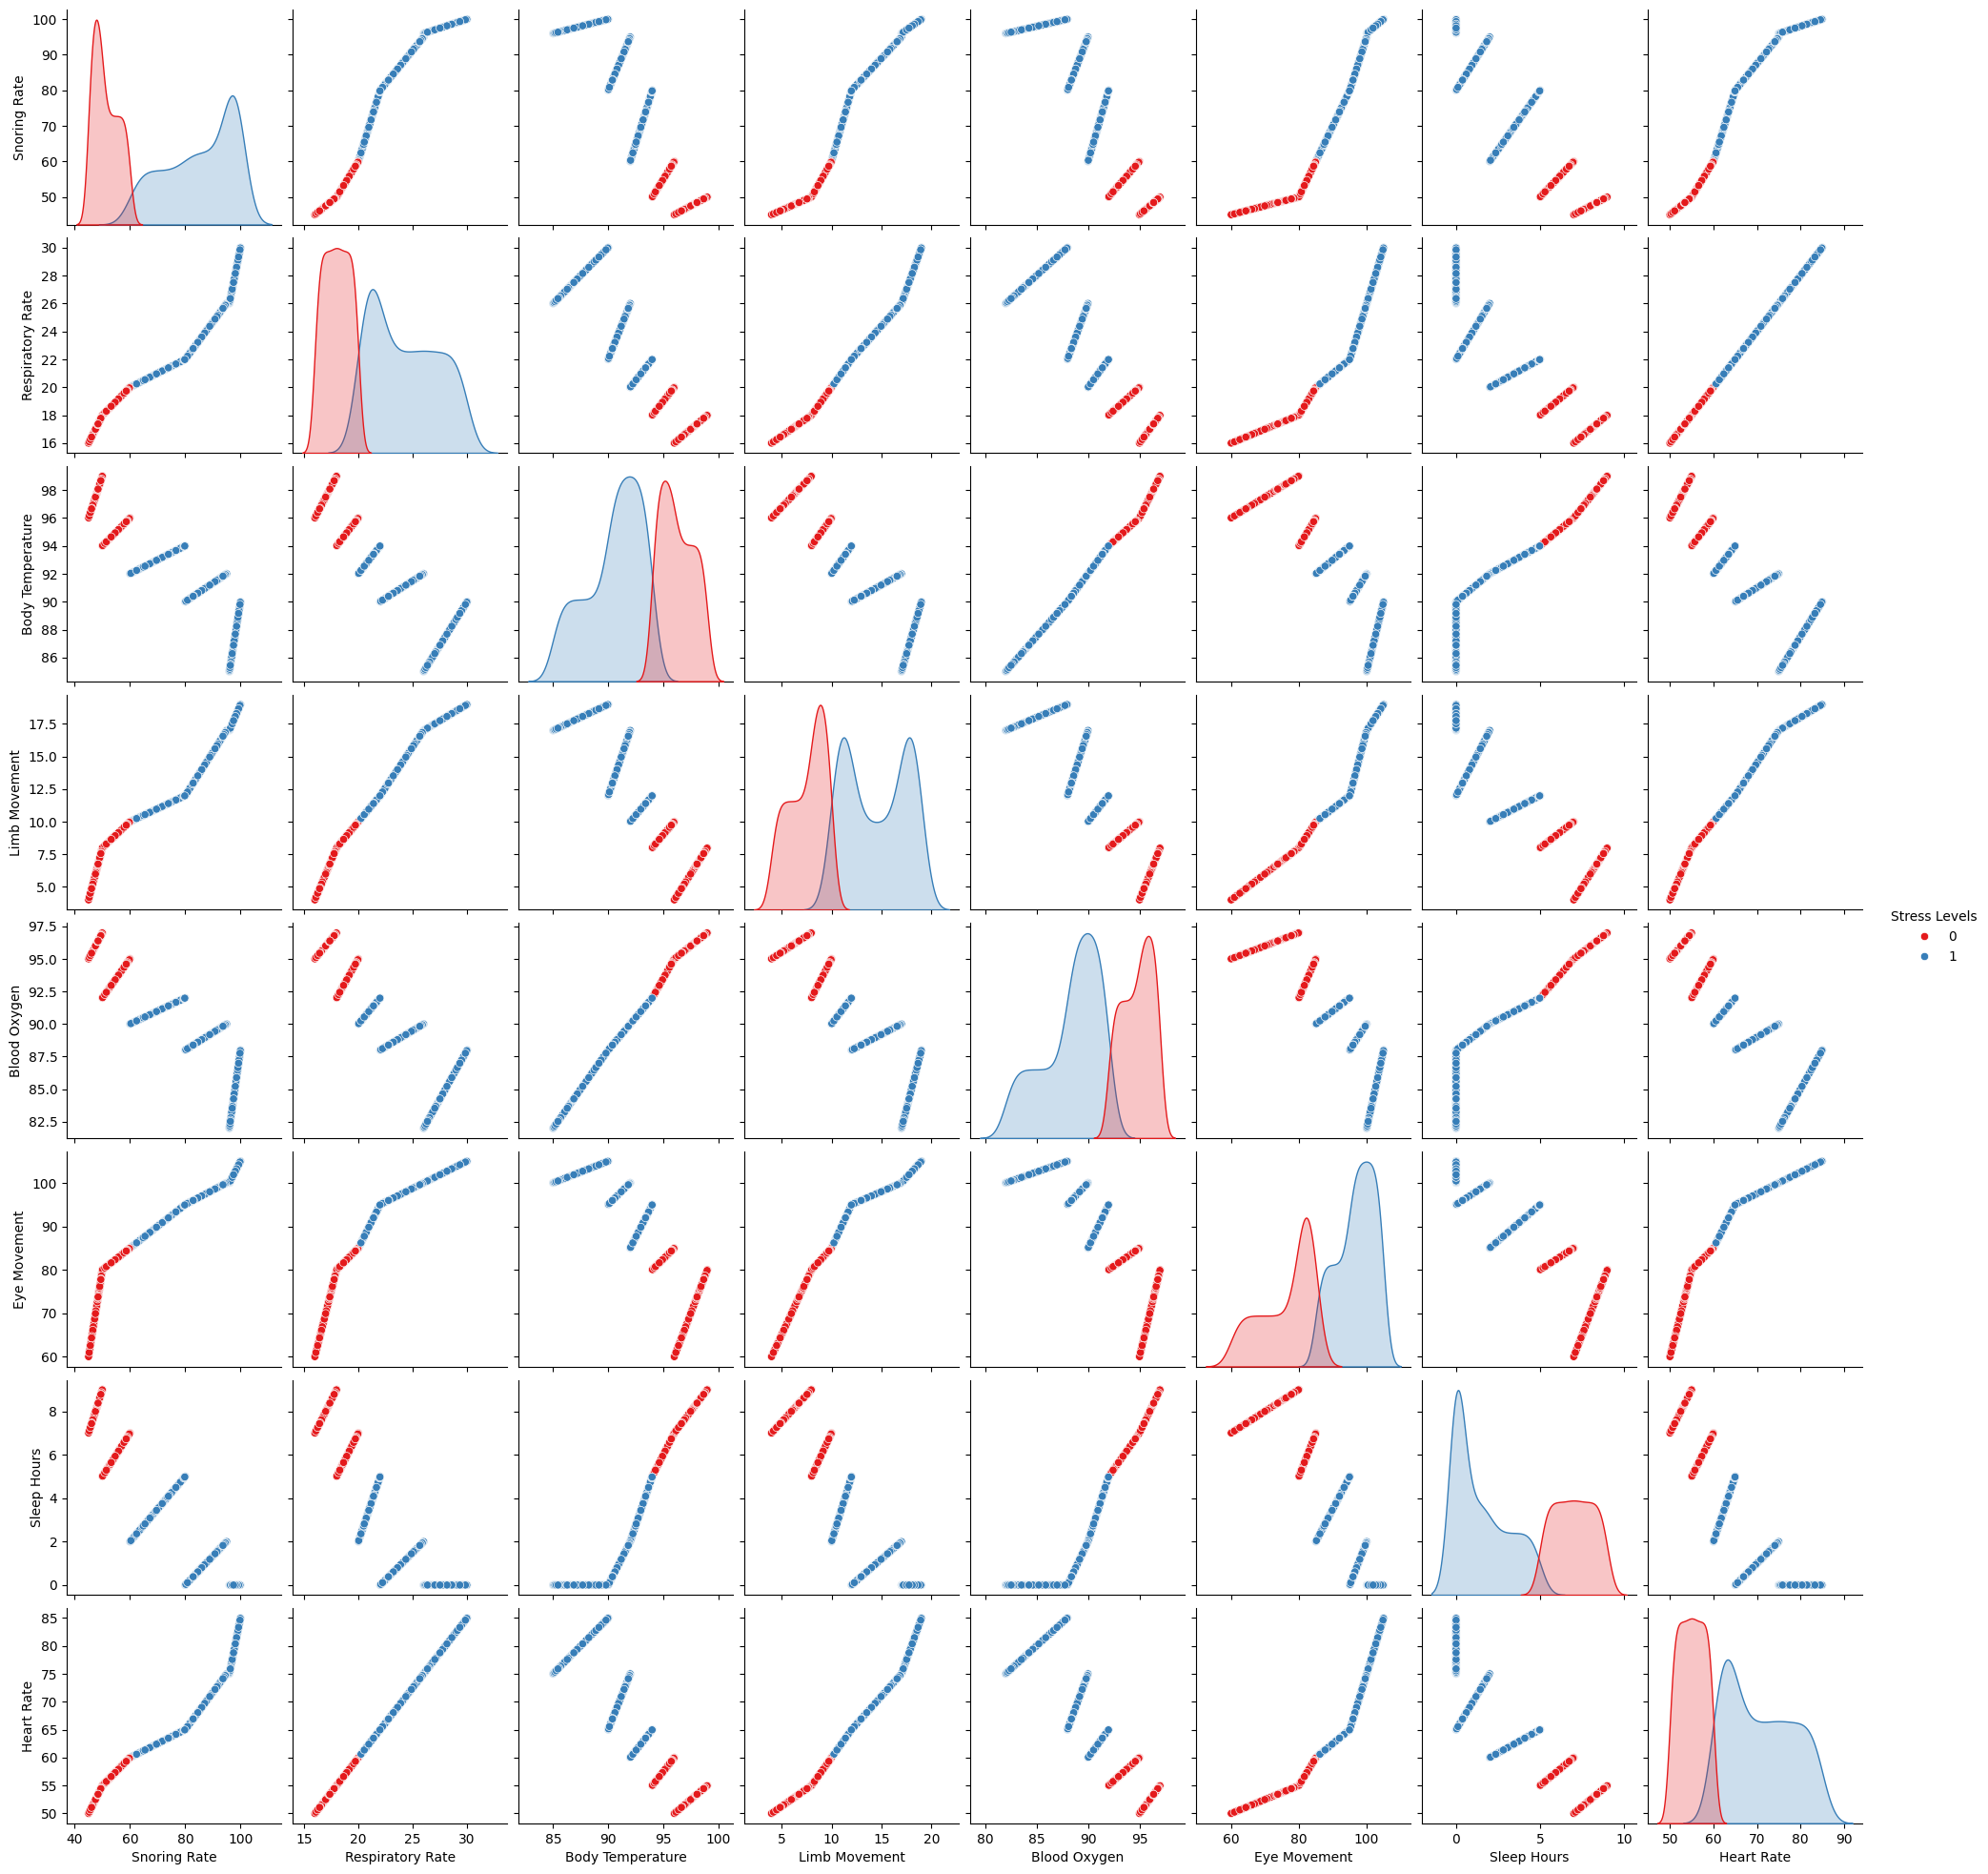

In [12]:
# Create a pairplot
sns.pairplot(df, hue='Stress Levels', diag_kind='kde', palette='Set1')

# Show the plot
plt.show()

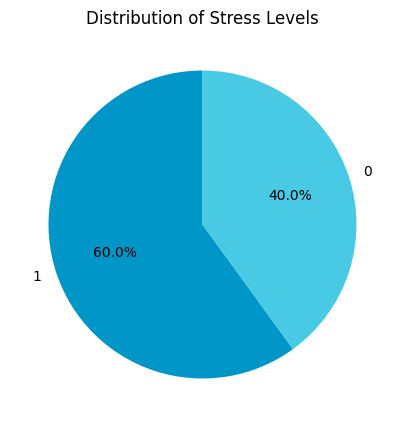

In [13]:
# Calculate the distribution of stress levels
stress_level_distribution = df['Stress Levels'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(stress_level_distribution, labels=stress_level_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#0096C7', '#48CAE4', '#90E0EF', '#00B4D8', '#023E8A'])

# Add a title
plt.title('Distribution of Stress Levels')

# Display the plot
plt.show()

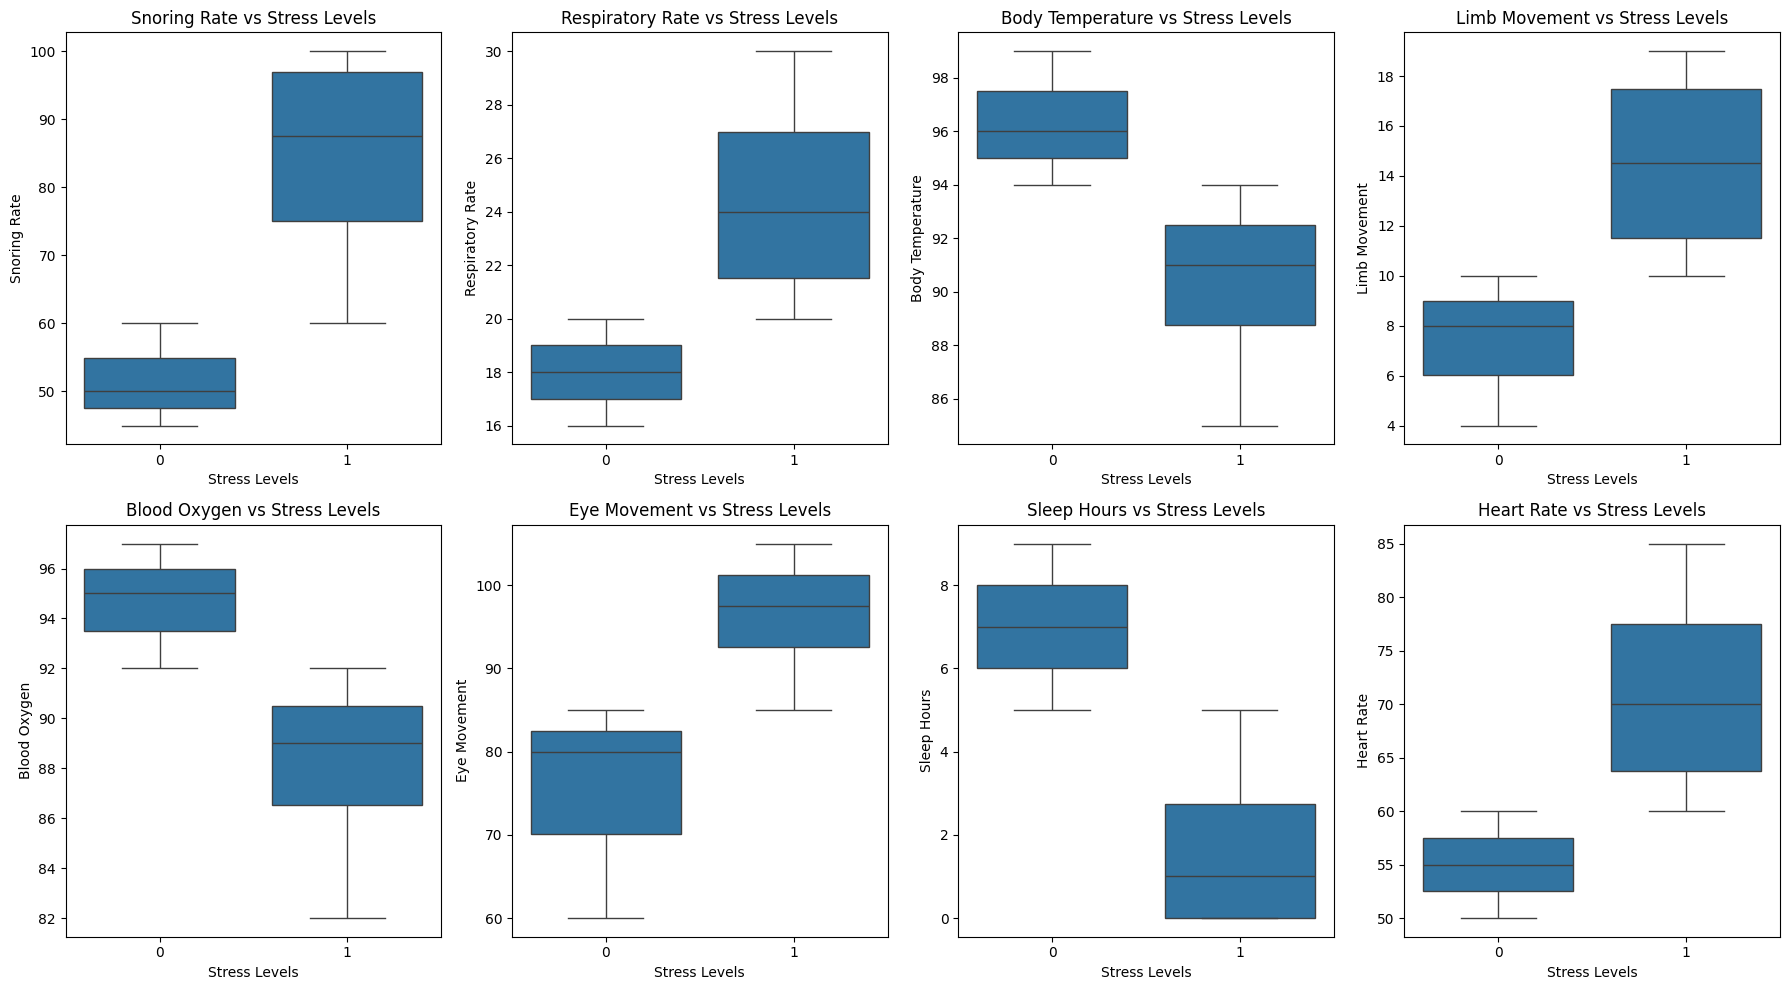

In [14]:
# Define the columns for which you want to plot boxplots
columns = ['Snoring Rate', 'Respiratory Rate', 'Body Temperature', 'Limb Movement', 'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 'Heart Rate']

# Set up a 2x4 grid for boxplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # 2 rows, 4 columns

# Loop through each column and plot a boxplot in the respective grid position
for i, column in enumerate(columns):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    sns.boxplot(x='Stress Levels', y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs Stress Levels')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Model Building

##### Splitting The Dataset

In [15]:
# Feature columns (X) and target column (y)
X = df.drop(columns=['Stress Levels']) # Drop 'Stress Levels' as it's the target
y = df['Stress Levels'] # Target

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape

((504, 8), (126, 8))

##### Scalling the Features
###### Standard Scalling

In [16]:
# Scalling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

X_train_Scaled = pd.DataFrame(X_train_Scaled, columns=X_train.columns)
X_test_Scaled = pd.DataFrame(X_test_Scaled, columns=X_test.columns)

joblib.dump(scaler, 'scaler.pkl')

X_train_Scaled.head(5)

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate
0,-1.301633,-1.327488,1.108551,-1.543234,1.164850,-1.942095,1.226503,-1.327488
1,-1.262613,-1.251576,1.238457,-1.403343,1.243043,-1.690246,1.325919,-1.251576
2,-0.927862,-0.776126,0.527390,-0.689163,0.537245,-0.550296,0.640470,-0.776126
3,-0.241931,-0.280699,-0.046933,-0.232677,-0.071841,0.003110,-0.233347,-0.280699
4,-0.599273,-0.456496,0.892040,-0.394656,1.031098,-0.285191,1.059065,-0.456496


In [17]:
# Checking Mean value(0) and Standard Deviation(1) after Scaling
np.round(X_train_Scaled.describe(), 1)

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate
count,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.4,-1.5,-2.2,-1.8,-2.3,-2.4,-1.2,-1.5
25%,-1.0,-0.8,-0.6,-0.7,-0.6,-0.6,-1.0,-0.8
50%,-0.1,-0.2,0.1,-0.2,0.0,0.1,-0.1,-0.2
75%,1.0,0.8,0.8,1.0,0.9,0.9,0.9,0.8
max,1.5,2.0,1.8,1.7,1.6,1.4,1.7,2.0


#### Building the ANN Model
<h6> An Artificial Neural Network consists of layers (input, hidden, and output). For predicting stress, we'll use a sequential model with Dense layers. May use ReLU as an activation function for hidden layers and softmax for multi-class classification output.</h6>

In [18]:
# Convert labels to categorical (one-hot encoding)
# y_train_encoded = to_categorical(y_train)
# y_test_encoded = to_categorical(y_test)

# Initialize the ANN model
model = Sequential()

# Adding input layer and the first hidden layer (neurons=64, activation='relu')
model.add(Dense(units=64, activation= 'relu', input_shape=(X_train.shape[1],)))

# Adding more hidden layers (neurons=32, activation='relu')
model.add(Dense(units=32, activation= 'relu'))

# Adding the output layer (for multi-class classification, use softmax)
model.add(Dense(units=1, activation= 'sigmoid')) # 2 classes for stress levels (0-1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model Summary
model.summary()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model
<h6>Training the ANN model using the training data. Defining the number of epochs and batch size. Early stopping can be used to prevent overfitting.</h6>

In [19]:
# Training The Model

history = model.fit(X_train_Scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_Scaled, y_test))


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5911 - loss: 0.6218 - val_accuracy: 0.7937 - val_loss: 0.3694
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - loss: 0.3111 - val_accuracy: 0.7857 - val_loss: 0.2546
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9218 - loss: 0.2094 - val_accuracy: 0.8968 - val_loss: 0.2004
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1588 - val_accuracy: 1.0000 - val_loss: 0.1590
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1275 - val_accuracy: 1.0000 - val_loss: 0.1295
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0914 - val_accuracy: 1.0000 - val_loss: 0.1083
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 0.0894
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0515 - val_accuracy: 1.0000 - val_loss

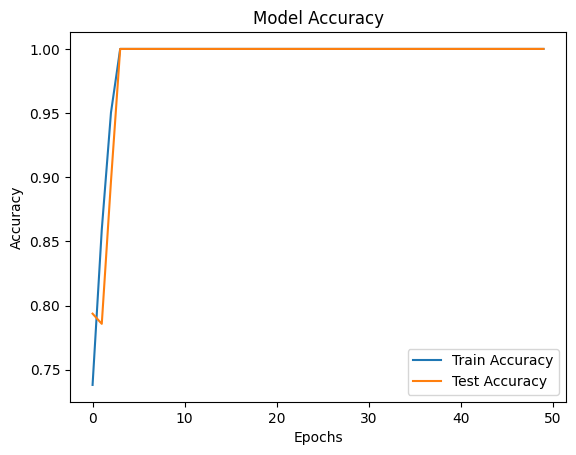

In [20]:
# Plot training & validation accuracy and loss over epochs
# it helps to check overfitting
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#As there is no gap between Train and Test Accuracy Means: There is not much Overfitting.

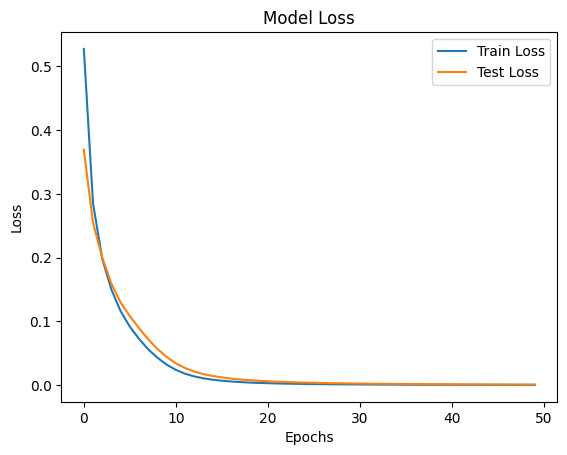

In [21]:
# Plot training and loss over epochs.
# it helps to check overfitting 
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#as there is no gap between Train and Test Loss Means: There is not much Overfitting.


### Evaluate the Model

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_Scaled, y_test)
print(f'Test Accuracy: {test_accuracy*100: .2f}')
print(f'Test Loss: {test_loss*100: .2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.7250e-04
Test Accuracy:  100.00
Test Loss:  0.09


### Save the Model

In [23]:
model.save("Human Stress Predictions.h5")

### Prediction On Unseen Data (Real Time Predictions)

In [ ]:
# Loading the Model and Scaler for Deployment.
from tensorflow.keras.models import load_model
loaded_model = load_model('D:\Ankit-KCode\Human Stress Detection and Prediction\Human Stress Predictions.h5')
loaded_scaler = joblib.load('D:\Ankit-KCode\Human Stress Detection and Prediction\scaler.pkl')

In [41]:
# Make Prediction new Unseen Data
new_data = np.array([[60,18,70,8,97,60,9,75]]) # Replace With actual new Data
new_data_scaled = loaded_scaler.transform(new_data) 
prediction = loaded_model.predict(new_data_scaled)


#Output Prediction in Words.
if prediction > 0.5:
    print("Stressed")

else:
    print("Not Stressed")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Not Stressed


c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Model Deployment

In [ ]:
# y_predict = model.predict(X_test_Scaled)
# y_predict_classes = y_predict.argmax(axis=-1)
# # print(y_predict_classes)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test, y_predict_classes))
# print(confusion_matrix(y_test, y_predict_classes))